In [27]:
import os
import pandas as pd
import numpy as np
import random
import gc
from datetime import datetime
from tqdm import tqdm
import matplotlib.pyplot as plt
from gensim.corpora import WikiCorpus
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
from sklearn.feature_extraction.text import TfidfVectorizer
from  collections import Counter

np.random.seed(2019)
random.seed(2019)
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 280)
pd.set_option('display.max_colwidth', 150)
data_path = '/data/workspace/kimi/tencent_ads/2020/dataset'
preprocess_path = 'preprocess'

In [2]:
clk_df = pd.read_csv(f'{data_path}/train_preliminary/click_log.csv' )
print(clk_df)

          time  user_id  creative_id  click_times
0            9    30920       567330            1
1           65    30920      3072255            1
2           56    30920      2361327            1
3            6   309204       325532            1
4           59   309204      2746730            1
...        ...      ...          ...          ...
30082766     6    30920       228129            1
30082767    57    30920      2361397            1
30082768    26    30920       629802            1
30082769    86    30920      2713031            1
30082770    25    30920       629802            1

[30082771 rows x 4 columns]


900000
839368    16868
157585     1706
677301     1661
178333     1321
549175     1273
524400     1237
98218      1225
280513     1162
674070     1160
407744     1011
Name: user_id, dtype: int64
727101    9
237550    9
245469    9
883050    9
753605    9
         ..
465891    9
555658    9
893881    9
654010    9
370918    9
Name: user_id, Length: 1000, dtype: int64
599971    10
848428    10
420997    10
209880    10
288267    10
          ..
331185    10
689887    10
397193    10
633880    10
413145    10
Name: user_id, Length: 10000, dtype: int64
383624    26
845035    26
737997    26
562561    26
323781    26
          ..
716683    21
170685    21
199981    21
706702    21
217510    21
Name: user_id, Length: 100000, dtype: int64
896130
32.379326660194394
23.0
26.480884660712203


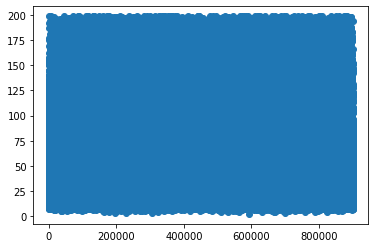

In [3]:
adv_count_value= clk_df['user_id'].value_counts()
print(len(adv_count_value))
print(adv_count_value[:10])
print(adv_count_value[-10000:-9000])
print(adv_count_value[-50000:-40000])
print(adv_count_value[-500000:-400000])
adv_count_value = adv_count_value[adv_count_value.values < 200]

#null_counts = adv_count_value['\\N']
#print(f"null:{null_counts}")
x = adv_count_value.index
y = adv_count_value.values
arr = np.array(adv_count_value.values)
print(len(arr))
print(np.mean(arr))
print(np.median(arr))
print(np.std(arr))

plt.scatter(x,y)
plt.show()


91
85    417797
78    406004
84    393253
64    388689
57    384115
74    381696
91    376422
63    376263
34    373768
36    371639
Name: time, dtype: int64
Int64Index([85, 78, 84, 64, 57, 74, 91, 63, 34, 36, 31, 77, 73, 43, 35, 75, 65, 37, 32, 33, 71, 56, 79, 67, 50, 70, 66, 88, 90, 81, 49, 82, 72, 83, 68, 80, 76, 86, 14, 55, 60, 54, 69, 87, 58, 42, 53, 61, 45, 52, 46, 22, 59, 40, 48, 89, 30, 51, 62, 41, 47, 15, 29, 44, 13, 39, 21,
            18, 28, 38,  1, 26, 17,  8, 19, 16, 25, 11,  7, 27, 23,  2, 24, 12, 10,  3, 20,  4,  5,  9,  6],
           dtype='int64')


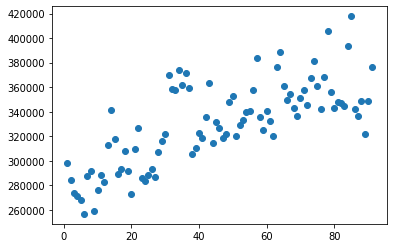

In [4]:
adv_count_value= clk_df['time'].value_counts()
print(len(adv_count_value))
print(adv_count_value[:10])
#null_counts = adv_count_value['\\N']
#print(f"null:{null_counts}")
x = adv_count_value.index
print(x)
y = adv_count_value.values
plt.scatter(x,y)
plt.show()

91
85    417797
78    406004
84    393253
64    388689
57    384115
74    381696
91    376422
63    376263
34    373768
36    371639
Name: time, dtype: int64
Int64Index([85, 78, 84, 64, 57, 74, 91, 63, 34, 36, 31, 77, 73, 43, 35, 75, 65, 37, 32, 33, 71, 56, 79, 67, 50, 70, 66, 88, 90, 81, 49, 82, 72, 83, 68, 80, 76, 86, 14, 55, 60, 54, 69, 87, 58, 42, 53, 61, 45, 52, 46, 22, 59, 40, 48, 89, 30, 51, 62, 41, 47, 15, 29, 44, 13, 39, 21,
            18, 28, 38,  1, 26, 17,  8, 19, 16, 25, 11,  7, 27, 23,  2, 24, 12, 10,  3, 20,  4,  5,  9,  6],
           dtype='int64')


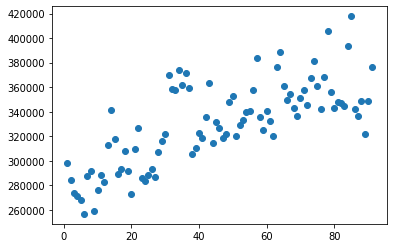

In [5]:
adv_count_value= clk_df['time'].value_counts()
print(len(adv_count_value))
print(adv_count_value[:10])
#null_counts = adv_count_value['\\N']
#print(f"null:{null_counts}")
x = adv_count_value.index
print(x)
y = adv_count_value.values
plt.scatter(x,y)
plt.show()

        user_id  click_times_total
697474   697475                 10
815798   815799                 10
815807   815808                 10
142089   142090                 10
339275   339276                 10
...         ...                ...
677300   677301               1669
178332   178333               1714
157584   157585               1742
674069   674070               1776
839367   839368              21330

[900000 rows x 2 columns]


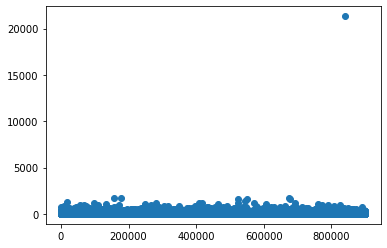

In [6]:
user_click_sum_df = clk_df.groupby(['user_id']).click_times.sum().reset_index().rename(columns={'click_times':'click_times_total'}).sort_values(by='click_times_total')
print(user_click_sum_df)
x = user_click_sum_df['user_id'].values.tolist()
y = user_click_sum_df['click_times_total'].values.tolist()
plt.scatter(x,y)
plt.show()

    time  day_uv
5      6  178935
8      9  179054
19    20  187083
9     10  188802
4      5  189077
..   ...     ...
63    64  243023
56    57  243886
73    74  246377
77    78  249852
84    85  255551

[91 rows x 2 columns]


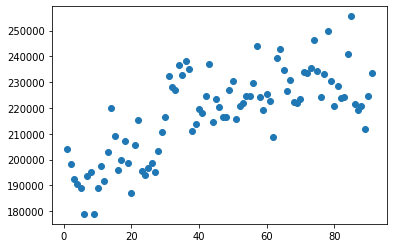

In [7]:
day_uv_df = clk_df.groupby(['time']).user_id.nunique().reset_index().rename(columns={'user_id':'day_uv'}).sort_values(by='day_uv')
print(day_uv_df)
x = day_uv_df['time'].values.tolist()
y = day_uv_df['day_uv'].values.tolist()
plt.scatter(x,y)
plt.show()

    time  creative_id
0      1            4
1      2            7
2      3            5
3      4            5
4      5            3
..   ...          ...
84    86            3
85    87            1
86    88            4
87    89            1
88    91            1

[89 rows x 2 columns]


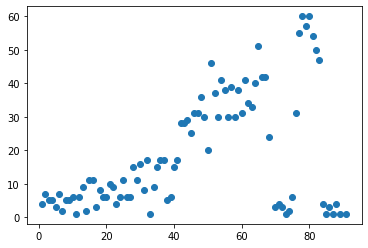

In [8]:
user_p_df  = clk_df[clk_df.user_id == 157585].groupby(['time']).click_times.count().reset_index().rename(columns={'click_times':'creative_id'})
print(user_p_df)
x = user_p_df['time'].values.tolist()
y = user_p_df['creative_id'].values.tolist()
plt.scatter(x,y)
plt.show()

   time  creative_id
0     2            1
1     8            1
2    30            2
3    31            2
4    73            4


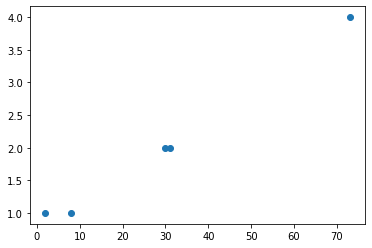

In [9]:
user_ps_df  = clk_df[clk_df.user_id == 727101].groupby(['time']).click_times.sum().reset_index().rename(columns={'click_times':'creative_id'})
print(user_ps_df)
x = user_ps_df['time'].values.tolist()
y = user_ps_df['creative_id'].values.tolist()
plt.scatter(x,y)
plt.show()

In [10]:
ad_df = pd.read_csv(f'{data_path}/train_preliminary/ad.csv' )

In [11]:
user_ins_df = clk_df[clk_df.user_id == 157585]
user_ins_df= user_ins_df.merge(ad_df,on='creative_id').sort_values(by='time')
print(user_ins_df)

      time  user_id  creative_id  click_times    ad_id product_id  product_category  advertiser_id industry
209      1   157585       238194            1   214100       1766                 2          39495       \N
562      1   157585       130042            1   116893      26858                 3           9458       60
354      1   157585        90587            2    82798      26858                 3           9458       60
661      1   157585        33446            1    32746      42008                17          18910       \N
213      2   157585       275192            1   247733         \N                18          14681      326
...    ...      ...          ...          ...      ...        ...               ...            ...      ...
1130    88   157585      2147997            1  1854843       9108                 3           2535      319
70      88   157585      4041528            1  3469295      37257                 4          21049       \N
177     88   157585      405

In [12]:
user_ins_df = clk_df[clk_df.user_id == 727101]
user_ins_df= user_ins_df.merge(ad_df,on='creative_id').sort_values(by='time')
print(user_ins_df)

   time  user_id  creative_id  click_times    ad_id product_id  product_category  advertiser_id industry
3     2   727101       119552            1   107970         \N                18          14681      297
7     8   727101       490785            1   437024         \N                18          17601       40
4    30   727101       383719            1   342799       1766                 2          34383      319
6    30   727101      1574717            1  1367152       1766                 2          42161      319
1    31   727101      1242486            1  1086873         94                 2          45848      245
8    31   727101      1121707            1   983648         \N                18          14681      216
0    73   727101      3358504            2  2889902       2400                 2          43538      246
2    73   727101      2635675            1  2268491       2400                 2          50845      246
5    73   727101      3535429            1  3044914    

In [13]:
user_ins_df = clk_df[clk_df.user_id == 420997]
user_ins_df= user_ins_df.merge(ad_df,on='creative_id').sort_values(by='time')
print(user_ins_df)

   time  user_id  creative_id  click_times    ad_id product_id  product_category  advertiser_id industry
9     3   420997        22126            1    22978         \N                12          10986      205
3     6   420997        31216            1    30911         \N                12          22400       54
5    41   420997      1768435            1  1531319      26976                 3            883      183
7    46   420997      1866093            1  1615591      39324                 4          28151       \N
8    69   420997      3378741            1  2907650        643                 3           2623        6
0    72   420997      2915786            1  2506618         \N                18          14681        6
4    73   420997      3510165            1  3023093         \N                18          14682        6
2    74   420997      3102293            1  2668742         \N                18          14681        6
6    77   420997      3541006            1  3049265    

In [14]:
user_ins_df = clk_df[clk_df.user_id == 737997]
user_ins_df= user_ins_df.merge(ad_df,on='creative_id').sort_values(by='time')
pd.set_option('display.max_rows', 100)
print(user_ins_df)
pd.set_option('display.max_rows', 10)

    time  user_id  creative_id  click_times    ad_id product_id  product_category  advertiser_id industry
4      5   737997       230303            1   206776      41655                17          30122       \N
3      6   737997       230303            1   206776      41655                17          30122       \N
21     8   737997       331825            1   298107      41655                17          30124       \N
11     8   737997       230844            1   207295      41655                17          30124       \N
24    23   737997       621801            1   552149         \N                18            847       27
20    25   737997       136085            1   122288         \N                18          37156       13
0     26   737997       422565            1   376603         \N                18          24675       47
22    35   737997       160316            1   143752         \N                18            899       27
8     50   737997      2386964            2  2

In [15]:
user_ins_df = clk_df[clk_df.user_id == 323781]
user_ins_df= user_ins_df.merge(ad_df,on='creative_id').sort_values(by='time')
pd.set_option('display.max_rows', 100)
print(user_ins_df)
pd.set_option('display.max_rows', 10)

    time  user_id  creative_id  click_times    ad_id product_id  product_category  advertiser_id industry
24     2   323781       127222            1   114519      26858                 3          29869       60
19     3   323781       318574            1   286229         \N                 5          19862        6
1      4   323781       320256            1   287821         \N                 5          13872       89
10     4   323781       201221            1   180675         \N                 5          18784      205
20     5   323781       303160            1   272203         \N                 5          36186       88
15    27   323781      1354554            1  1183922       9170                 3          43415      253
22    35   323781      1414984            1  1234451      26858                 3          19622       60
13    35   323781       619158            1   549778      26858                 3          19622       60
25    36   323781      1354136            1  1

In [16]:
user_day_count_df = clk_df.groupby(['user_id']).time.nunique().reset_index().rename(columns={'time':'active_days'})
print(user_day_count_df)

        user_id  active_days
0             1           10
1             2           28
2             3           23
3             4           15
4             5           26
...         ...          ...
899995   899996           12
899996   899997           14
899997   899998           10
899998   899999           17
899999   900000           12

[900000 rows x 2 columns]


In [17]:
user_day_count_df = clk_df.groupby(['user_id']).time.nunique().reset_index().rename(columns={'time':'active_days'})
print(user_day_count_df)

        user_id  active_days
0             1           10
1             2           28
2             3           23
3             4           15
4             5           26
...         ...          ...
899995   899996           12
899996   899997           14
899997   899998           10
899998   899999           17
899999   900000           12

[900000 rows x 2 columns]


In [18]:
user_df = user_day_count_df.merge(user_click_sum_df,on='user_id')
print(user_df)

        user_id  active_days  click_times_total
0             1           10                 14
1             2           28                 46
2             3           23                 30
3             4           15                 29
4             5           26                 34
...         ...          ...                ...
899995   899996           12                 14
899996   899997           14                 20
899997   899998           10                 15
899998   899999           17                 22
899999   900000           12                 12

[900000 rows x 3 columns]


In [19]:
merged_df = clk_df.merge(ad_df,on='creative_id')
merged_df['wday'] = merged_df['time'].apply(lambda x :int(x /7))
merged_df['month'] = merged_df['time'].apply(lambda x :int(x /30))
print(merged_df)

          time  user_id  creative_id  click_times    ad_id product_id  product_category  advertiser_id industry  wday  month
0            9    30920       567330            1   504423      30673                 3          32638      319     1      0
1           15   320815       567330            1   504423      30673                 3          32638      319     2      0
2           11   355089       567330            1   504423      30673                 3          32638      319     1      0
3            9   363442       567330            1   504423      30673                 3          32638      319     1      0
4           14   370513       567330            1   504423      30673                 3          32638      319     2      0
...        ...      ...          ...          ...      ...        ...               ...            ...      ...   ...    ...
30082766    52   309198      2459911            1  2119242        161                 2            676      231     7      1


18
2     12452751
18     8518204
3      2864262
5      2411464
12     1524927
17      784455
8       773074
13      388749
4       153879
7        70145
Name: product_category, dtype: int64


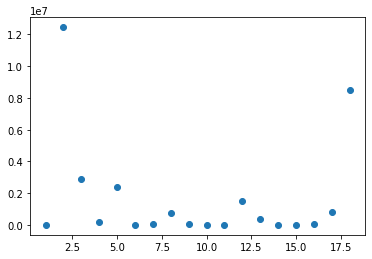

In [20]:
adv_count_value= merged_df['product_category'].value_counts()
print(len(adv_count_value))
print(adv_count_value[:10])
#null_counts = adv_count_value['\\N']
#print(f"null:{null_counts}")
x = adv_count_value.index
y = adv_count_value.values
plt.scatter(x,y)
plt.show()

In [24]:
def get_product_category(log):
    dic ={}
    result = []
    for row in tqdm(log[['time', 'user_id','product_category']].values,total=len(log)):
        try:
            c = dic[row[1]]
            c.update(row[2])
        except Exception as e:
            c = Counter([row[2]])
            dic[row[1]] = c
    for k,v in tqdm(dic.items(),total=len(dic)):
        d = {}
        for i in range(18):
            d[i] =0;
        
        total_clk = 0
        for category,count in v.items():
            d[category -1] = count
            total_clk+=  count
            result.append([k] + list(d.values()) + (np.array(list(d.values()))/total_clk).tolist())
    cols = ['user_id'] + [f'product_category_{i}' for i in range(18)] + [f'product_category_{i}_percent' for i in range(18)]
    ret_df = pd.DataFrame(result,columns=cols)
    return ret_df

In [25]:
product_category_df =  get_product_category(merged_df)
product_category_df.to_pickle(f'{preprocess_path}/product_category.pkl')

100%|██████████| 900000/900000 [00:14<00:00, 60571.79it/s]


NameError: name 'preprocess_path' is not defined

In [28]:
product_category_df.to_pickle(f'{preprocess_path}/product_category.pkl')
print(product_category_df)

        user_id  product_category_0  product_category_1  product_category_2  product_category_3  product_category_4  product_category_5  product_category_6  product_category_7  product_category_8  product_category_9  product_category_10  product_category_11  \
0         30920                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                    0                    0   
1        320815                   0                   0                   1                   0                   0                   0                   0                   0                   0                   0                    0                    0   
2        355089                   0                   1                   0                   0                   0                   0                   0                   0                   0                   0  

In [ ]:
print((np.array(list([1,2,3]))/ 6).tolist() +[1])